In [29]:
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('/mnt/e/Term 3/Machin-Learning/Projects/08 pro/data/dataset-Q5-1.csv')

In [3]:
df1.head()

,Feature 1,Feature 2,class
0,3.127071,4.013042,1.0
1,5.312935,6.770534,1.0
2,6.340428,6.420996,1.0
3,6.294548,3.595620,1.0
4,4.944105,4.477241,1.0


In [4]:
df1.tail(5)

,Feature 1,Feature 2,class
195,-6.325239,3.080488,-1.0
196,-4.741314,5.970952,-1.0
197,-4.581615,5.196672,-1.0
198,4.871664,5.690409,1.0
199,-3.062896,7.525581,-1.0


In [5]:
df1.describe()

,Feature 1,Feature 2,class
count,200.000000,200.000000,200.000000
mean,0.127291,4.998048,0.000000
std,5.118691,1.029297,1.002509
min,-7.121909,2.778002,-1.000000
25%,-4.728096,4.353238,-1.000000
50%,-0.465923,4.866166,0.000000
75%,5.107184,5.679383,1.000000
max,7.663322,8.484226,1.000000


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   class      200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [8]:
df1['class'].unique()

array([ 1., -1.])

In [9]:
df1['class'].value_counts()

class
 1.0    100
-1.0    100
Name: count, dtype: int64

In [12]:
colors = df1['class'].map({1: 'blue', -1: 'red'})

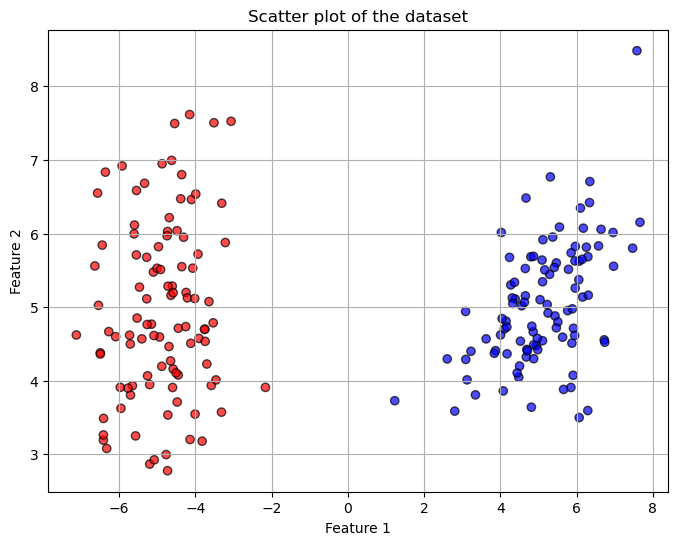

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(df1['Feature 1'], df1['Feature 2'], c=colors, alpha=0.7, edgecolors='k')
plt.title("Scatter plot of the dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [26]:
X = np.array(df1.iloc[:,  :-1])
y = np.array(df1.iloc[:, -1])

print(X.shape)
print(y.shape)

(200, 2)
(200,)


In [30]:
# Define optimization variables
w = cp.Variable(2)
b = cp.Variable()

In [31]:
# Define constraints: y_i (w^T x_i + b) >= 1
constraints = [y[i] * (X[i] @ w + b) >= 1 for i in range(len(y))]

In [32]:
# Define the objective function: minimize ||w||^2 / 2
objective = cp.Minimize(cp.norm(w) ** 2 / 2)

In [33]:
# Solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

0.1734636429992015

In [38]:
# Extract weights and bias
w_val = w.value
b_val = b.value

print(f'W is : {w_val}')
print(f'b is: {b_val}')


W is : [ 0.58816745 -0.03140604]
b is: 0.394010424624707


In [46]:
# Find support vectors
support_vectors = X[np.isclose(y * (X @ w_val + b_val), 1)]

In [61]:
# Plot decision boundary and margins
xx = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
yy = -(w_val[0] / w_val[1]) * xx - (b_val / w_val[1])

yy_margin1 = (-w_val[0] * xx - b_val + 1) / w_val[1]  # Upper margin
yy_margin2 = (-w_val[0] * xx - b_val - 1) / w_val[1]  # Lower margin

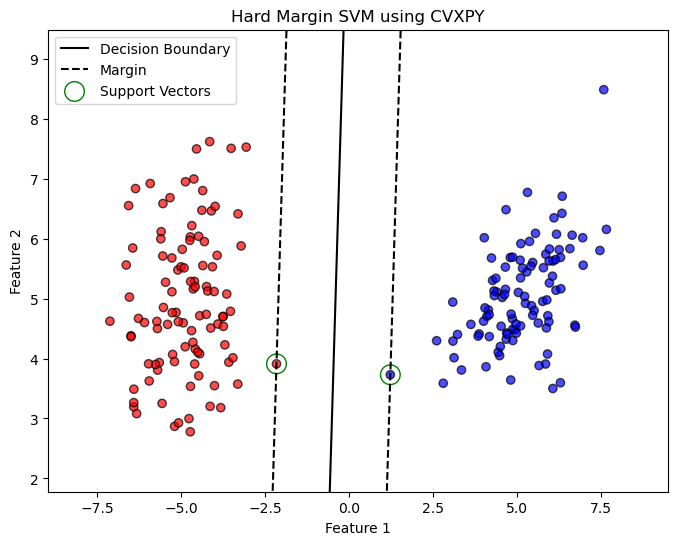

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.7, edgecolors='k')
plt.plot(xx, yy, 'k', label='Decision Boundary')
plt.plot(xx, yy_margin1, 'k--', label='Margin')
plt.plot(xx, yy_margin2, 'k--')

# Highlight support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
            s=200, facecolors='none', edgecolors='g', label='Support Vectors')

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
plt.title('Hard Margin SVM using CVXPY')
plt.show()

In [63]:
# Print results
print(f"Optimal w: {w_val}")
print(f"Optimal b: {b_val}")
print(f"Support Vectors Count:\n{len(support_vectors)}")
print("Support Vectors:")
print(support_vectors)

Optimal w: [ 0.58816745 -0.03140604]
Optimal b: 0.394010424624707
Support Vectors Count:
2
Support Vectors:
[[-2.16128551  3.9104791 ]
 [ 1.22943971  3.72943701]]
